In [1]:
import pandas as pd
cont = pd.read_csv('continents.csv', sep=';')
cont.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [2]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx')
life.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [3]:
life.rename(columns={'Life expectancy': 'country'}, inplace=True)
life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [4]:
df = pd.merge(left = life, right = cont, on = 'country', how = 'inner')
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,continent
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72,Asia
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10,Europe
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50,Africa
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80,Europe
4,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00,Africa


In [5]:
df.shape

(176, 219)

In [6]:
df = df.dropna()
df.shape

(167, 219)

In [7]:
df_long = df.melt(id_vars=['country','continent'], var_name='year', value_name='life_expectancy')

In [8]:
df_long.head()

,country,continent,year,life_expectancy
0,Afghanistan,Asia,1800,28.21
1,Albania,Europe,1800,35.40
2,Algeria,Africa,1800,28.82
3,Angola,Africa,1800,26.98
4,Antigua and Barbuda,North America,1800,33.54


In [9]:
df_long.groupby('continent').max()

,country,year,life_expectancy
continent,,,
Africa,Zimbabwe,2016,77.6
Asia,Yemen,2016,83.3
Australia and Oceania,Vanuatu,2016,82.4
Europe,United Kingdom,2016,83.3
North America,United States,2016,81.7
South America,Venezuela,2016,79.7


In [10]:
df_long.groupby('continent').min()

,country,year,life_expectancy
continent,,,
Africa,Algeria,1800,1.50
Asia,Afghanistan,1800,4.00
Australia and Oceania,Australia,1800,1.00
Europe,Albania,1800,8.11
North America,Antigua and Barbuda,1800,9.69
South America,Argentina,1800,26.98


In [11]:
df_long_max = df_long.groupby('continent').max()
df_long_min = df_long.groupby('continent').min()

In [12]:
type(df_long_max)

pandas.core.frame.DataFrame

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Australia and Oceania'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South America')])

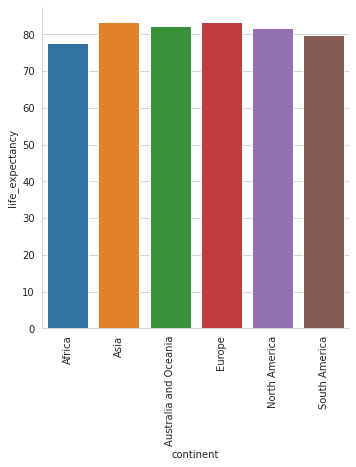

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

df_long_max = df_long_max.reset_index()
sns.catplot(x="continent", y="life_expectancy", data=df_long_max, kind="bar")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Australia and Oceania'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South America')])

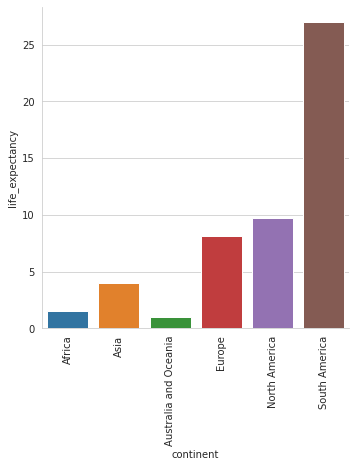

In [14]:
df_long_min = df_long_min.reset_index()
sns.catplot(x="continent", y="life_expectancy", data=df_long_min, kind="bar")
plt.xticks(rotation=90)